In [1]:
import sys
#sys.path.append('/home/jovyan/brian2lava')
#sys.path.append('/home/carlo/Entwicklung/Python/brian2lava')
#sys.path.append('/home/francesco/Developing/B2L/brian2lava')
#sys.path.append('/homes/jlubo/brian2lava')

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

## Import Brian2 / Brian2Lava

In [3]:
from brian2 import *

## Import Brian2Lava and set device

In [4]:
# Import Brian2Lava
#import brian2lava

# Set device
#set_device('lava', mode='flexible', hardware='CPU')

## Set seed and defaultclock

In [5]:
# Set seed
seed(1)

# Set defaultclock
defaultclock.dt = 0.5*ms

## Define LIF model

In [6]:
N = 10  # Number of neurons

taum = 20*ms  # Decay
Vt = -50*mV  # Threshold
Vr = -60*mV  # Reset potential
El = -52*mV  # Resting potential
ref = 2*ms  # Refractory time
taue = 5*ms  # Decay

# Define LIF neuron equation
eqs = '''
dv/dt = (v+ge-El)/taum + 2*mV*(xi*sqrt(ms) + 0.5)/ms: volt (unless refractory)
dge/dt = -ge/taue : volt
'''

# Add neuron group
P = NeuronGroup(N, eqs, threshold='v>Vt', reset='v = Vr', refractory=ref, method='euler')

S = Synapses(P, P, model = 'w : volt', on_pre= 'v+=w')
S.connect(i=[0,0,3,1,2],j= [1,2,3,1,4])
S.w= 10*volt

# Preset voltages
#P.v = Vr
P.v[:2] = '20*rand()*mV+Vr' # '1.1*Vr'
P.v[2:5] = 'Vr'
P.v[5:] = '5*rand()*mV+Vr' # '1.2*Vr'
P.ge[5:] = '0.1*rand()*Vr' # '0.1*Vr'

## Add monitors

In [7]:
# Add monitor for spikes
sm = SpikeMonitor(P)

# Add monitor for voltage
stm = StateMonitor(P, variables='v', record=True)

## Run simulation

In [8]:
# Run simulation
run(200*ms)

## Plot voltage of one neuron

In [9]:
stm.v

array([[-51.65955991, -50.69985949, -50.10765672, ..., -50.47487097,
        -51.15541975, -50.53047888],
       [-45.59351013, -60.        , -60.        , ..., -62.66270069,
        -61.76015333, -60.91580732],
       [-60.        , -57.63226713, -58.82958437, ..., -53.54278197,
        -53.27775943, -55.46729359],
       ...,
       [-59.26622055, -60.58417972, -61.33846168, ..., -62.61907417,
        -61.35243872, -61.26430349],
       [-59.53830703, -59.53349419, -59.45221583, ..., -56.28775337,
        -57.14961986, -58.13649527],
       [-59.06869894, -60.08967862, -61.20780305, ..., -59.76355255,
        -59.34828412, -60.22546481]]) * mvolt

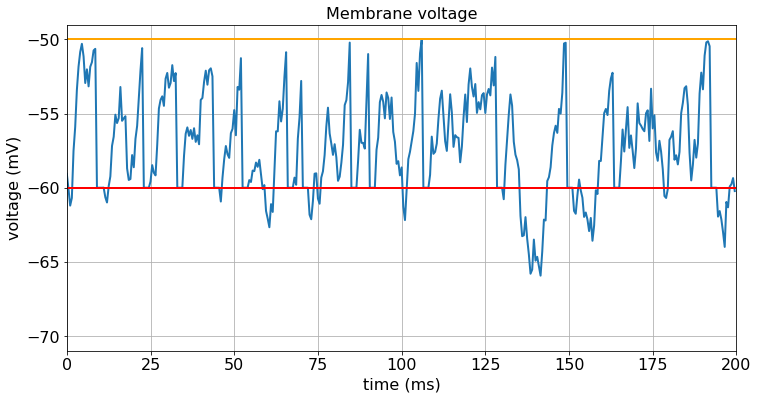

In [10]:
t = stm.t/ms
v = stm.v[9]/mV #stm.v/mV if np.ndim(stm.v/mV) == 1 else stm.v[0]/mV

plt.figure(figsize=(12,6))
plt.plot(t, v, linewidth=2)
plt.axhline(y=-50, color='orange', linestyle='-', linewidth=2)
plt.axhline(y=-60, color='red', linestyle='-', linewidth=2)
plt.grid()
plt.title('Membrane voltage')
plt.yticks(np.arange(-70,-49,5))
plt.xlim((0,200))
plt.ylim((-71,-49))
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
pl = plt.show()

## Plot spikes of all neurons

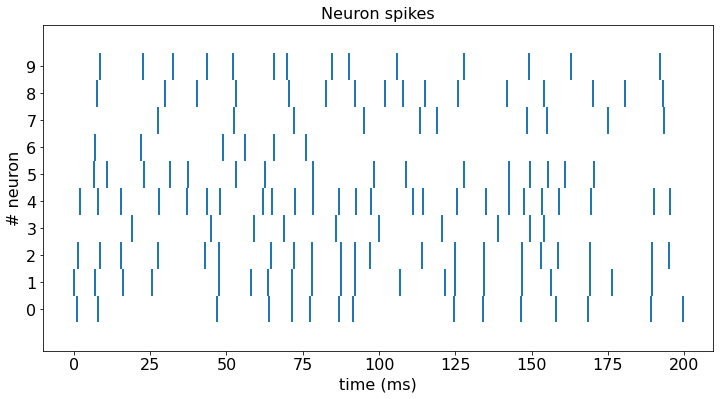

In [11]:
spike_times = [sm.t[sm.i == i]*1000 for i in range(N)]

plt.figure(figsize=(12,6))
plt.eventplot(spike_times, linewidth=2)
plt.title('Neuron spikes')
plt.xticks(np.arange(0,201,25))
plt.yticks(np.arange(0,N))
plt.xlabel('time (ms)')
plt.ylabel('# neuron')
pl = plt.show()

In [12]:
np.save('_compare/voltage_b.npy', np.vstack([t,v]), allow_pickle=True)
np.savez('_compare/spikes_b.npz', *spike_times, allow_pickle=True)